# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Исходные данные

In [205]:
#lam_M = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']
#lam_M2, lam_MM = [], []
#for i in range(0, 8):
#    for j in range(0, 8):
#        if i == j:
#            lam_M2.append(lam_M[i]+lam_M[j])
#        else:
#            continue
#for i in range(1, 8):
#    for j in range(0, i):
#        lam_MM.append(lam_M[i]+lam_M[j])
#lam = lam_M + lam_M2 + lam_MM
#lam

In [206]:
# Обозначим эмпирические данные молодых и взрослых особей
# И затащим их в один массив
# lam = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
lam_M = [0.0016, 0.00008, 0.0000007, 0.000016, 0.006, 0.004, 0.000000075, 0.00006]
lam_M2, lam_MM = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            lam_M2.append(lam_M[i]*lam_M[j])
        else:
            continue
for i in range(1, 8):
    for j in range(0, i):
        lam_MM.append(lam_M[i]*lam_M[j])
lam = lam_M + lam_M2 + lam_MM
# Сформируем вектор дополнительных данных 
sigma1, sigma2, D, D0 = 1, 1, 120, 70

# Количество генерируемых стратегий
Nmax = 40

### 2.2 Генерации стратегий

In [207]:
import random as rn
import pandas as pd
rn.seed(10)
# Генерация параметров для стратегий
# Запись параметров в data_strat
def strategy(Nmax):
    def rand_strat_A():
        A = []
        for i in range(0, Nmax):
            a = rn.randint(-D*100, 0)
            A.append(a)
        return A
    def rand_strat_B(a):
        A, B = [], []
        for i in range(0, Nmax):
            b = rn.randint(-min(-a[i], a[i] + D*100), 0)
            A.append(a[i]/100)
            B.append(b/100)
            A.append(a[i]/100)
            B.append(-b/100)
        return A, B

    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat2 = {'Aa': A, 'Ba': B}
    data2 = pd.DataFrame(data = data_strat2)
    data = pd.concat([data1, data2], axis=1)
    data.to_csv("data_strat.csv", index=False)
    return data
    
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-26.39,-11.03,-92.75,-11.26
1,-26.39,11.03,-92.75,11.26
2,-114.67,-4.88,-88.72,-10.98
3,-114.67,4.88,-88.72,10.98
4,-49.74,-1.99,-62.88,-1.96
...,...,...,...,...
75,-80.78,7.46,-53.68,3.86
76,-47.97,-40.06,-24.51,-5.92
77,-47.97,40.06,-24.51,5.92
78,-19.52,-10.48,-94.08,-6.06


### 2.3 Подсчет макропараметров и создание выборки

In [208]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров
# Запись их в data_macro
def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(0, len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M5'].append(sigma1*(Aa[i] + D))

      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))

      collect['M3'].append(-2*(np.pi)*(np.pi)*Bj[i]*Bj[i])
      collect['M7'].append(-2*(np.pi)*(np.pi)*Ba[i]*Ba[i])
      
      collect['M4'].append(-((Aj[i] + D0)*(Aj[i] + D0) + (Bj[i]*Bj[i])/2))
      collect['M8'].append(-((Aa[i] + D0)*(Aa[i] + D0) + (Ba[i]*Ba[i])/2))

   for i in range(1, 9):
      for j in range(1, 9):
         if i == j == 1 or i == j == 5:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         elif i == j:
            Z = -np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            continue

   for i in range(2, 9):
      for j in range(1, i):
         if i == 5 and j == 1:
            Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            Z = -np.abs(2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)]))
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
            
   data_macro = {}   
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)
data_macro

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,93.61,-88.095,-2401.489908,-1962.66255,27.25,-21.62,-2502.686910,-580.9563,8762.8321,-7760.729025,...,-9.823860e+06,-136396.436591,-108216.181985,-108766.638486,-102358.690497,-2.790321e+06,-2.280442e+06,-31662.118350,-25120.550412,-2.907903e+06
1,93.61,-99.125,-2401.489908,-1962.66255,27.25,-32.88,-2502.686910,-580.9563,8762.8321,-9825.765625,...,-9.823860e+06,-136396.436591,-164576.691197,-108766.638486,-115174.586475,-2.790321e+06,-2.280442e+06,-31662.118350,-38203.686288,-2.907903e+06
2,5.33,-2.890,-470.077414,-2007.31610,31.28,-25.79,-2379.766909,-410.7186,28.4089,-8.352100,...,-9.553889e+06,-148878.217819,-122748.377160,-4378.260276,-2373.953508,-3.861391e+05,-1.648884e+06,-25694.555616,-21184.865388,-1.954829e+06
3,5.33,-7.770,-470.077414,-2007.31610,31.28,-36.77,-2379.766909,-410.7186,28.4089,-60.372900,...,-9.553889e+06,-148878.217819,-175008.058479,-4378.260276,-6382.567044,-3.861391e+05,-1.648884e+06,-25694.555616,-30204.245844,-1.954829e+06
4,70.26,-69.265,-78.169241,-412.44765,57.12,-56.14,-75.830145,-52.6152,4936.4676,-4797.640225,...,-6.255193e+04,-8662.835712,-8514.208628,-7393.487904,-7288.783656,-8.225780e+03,-4.340203e+04,-6010.760448,-5907.634656,-7.979636e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,39.22,-42.950,-1098.518553,-144.03420,66.32,-68.25,-294.106315,-273.7922,1538.2084,-1844.702500,...,-8.472274e+04,-39010.261684,-40145.512062,-21476.260168,-23518.749980,-6.015316e+05,-7.887088e+04,-36315.797408,-37372.635300,-1.610480e+05
76,72.03,-52.000,-31677.553347,-1287.72270,95.49,-92.53,-691.788207,-2086.8633,5188.3209,-2704.000000,...,-1.781663e+06,-132117.711843,-128022.325655,-300633.526998,-217033.783200,-1.322134e+08,-5.374602e+06,-398549.153034,-386194.922298,-2.887335e+06
77,72.03,-92.060,-31677.553347,-1287.72270,95.49,-98.45,-691.788207,-2086.8633,5188.3209,-8475.043600,...,-1.781663e+06,-132117.711843,-136213.098030,-300633.526998,-384233.270796,-1.322134e+08,-5.374602e+06,-398549.153034,-410903.383770,-2.887335e+06
78,100.48,-95.240,-2167.965198,-2603.14560,25.92,-22.89,-724.894808,-598.2082,10096.2304,-9070.657600,...,-3.774013e+06,-37578.546866,-33185.684327,-120215.919872,-113946.697936,-2.593789e+06,-3.114446e+06,-31011.113088,-27385.971396,-8.672760e+05


In [209]:
import numpy as np
import pandas as pd
from collections import defaultdict
# Подсчет фитнесса
# Запись в data_fit_macro
def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()      
   M3 = data_macro['M3'].tolist()   
   M4 = data_macro['M4'].tolist()   
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]
      
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + (4*r*p + (p + q - s)**2)**0.5
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   #data = data.loc[data.J !=0]
   #data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

In [210]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit_macro.index)):
      for j in range(i + 1, len(data_fit_macro.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,-0.075263,0.00,11.030,0.000000,0.00000,0.00,11.26,0.000000,0.0000,0.0000,...,0.000000,56360.509212,0.000000,12815.895978,0.000000e+00,0.000000e+00,0.000000,13083.135876,0.000000e+00,-1.0
1,0.075263,0.00,-11.030,0.000000,0.00000,0.00,-11.26,0.000000,0.0000,0.0000,...,0.000000,-56360.509212,0.000000,-12815.895978,0.000000e+00,0.000000e+00,0.000000,-13083.135876,0.000000e+00,1.0
2,0.290561,88.28,-85.205,-1931.412494,44.65355,-4.03,4.17,-122.920001,-170.2377,8734.4232,...,12481.781228,14532.195174,-104388.378210,-99984.736989,-2.404182e+06,-6.315582e+05,-5967.562734,-3935.685024,-9.530744e+05,1.0
3,-0.290561,-88.28,85.205,1931.412494,-44.65355,4.03,-4.17,122.920001,170.2377,-8734.4232,...,-12481.781228,-14532.195174,104388.378210,99984.736989,2.404182e+06,6.315582e+05,5967.562734,3935.685024,9.530744e+05,-1.0
4,0.290561,88.28,-80.325,-1931.412494,44.65355,-4.03,15.15,-122.920001,-170.2377,8734.4232,...,12481.781228,66791.876493,-104388.378210,-95976.123453,-2.404182e+06,-6.315582e+05,-5967.562734,5083.695432,-9.530744e+05,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,-0.619292,28.45,-3.180,29509.588148,-1315.42290,-69.57,75.56,-33.106601,1488.6551,4907.9095,...,94539.164977,103027.413703,180417.607126,270286.572860,1.296197e+08,2.260156e+06,367538.039946,383517.412374,2.020059e+06,-1.0
6316,0.578573,-28.45,13.660,-29509.588148,1315.42290,69.57,-69.50,33.106601,-1488.6551,-4907.9095,...,-94539.164977,-94241.688626,-180417.607126,-257748.128988,-1.296197e+08,-2.260156e+06,-367538.039946,-376267.128990,-2.020059e+06,1.0
6317,-0.578573,28.45,-13.660,29509.588148,-1315.42290,-69.57,69.50,-33.106601,1488.6551,4907.9095,...,94539.164977,94241.688626,180417.607126,257748.128988,1.296197e+08,2.260156e+06,367538.039946,376267.128990,2.020059e+06,-1.0
6318,-0.040719,0.00,10.480,0.000000,0.00000,0.00,6.06,0.000000,0.0000,0.0000,...,0.000000,8785.725077,0.000000,12538.443872,0.000000e+00,0.000000e+00,0.000000,7250.283384,0.000000e+00,-1.0


In [211]:
import numpy as np
from collections import defaultdict
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      tmp = max(np.abs(data_param['M' + str(i)]))
      max_M.append(tmp)
      Z = np.array(data_param['M' + str(i)])/tmp
      data['M' + str(i)] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
            max_M.append(tmp)
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
            data['M' + str(i) + 'M' + str(j)] = Z
         else:
            continue   
   for i in range(2, 9):
      for j in range(1, i):
         tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
         max_M.append(tmp)
         Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
         data['M' + str(i) + 'M' + str(j)] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.000000,0.096725,0.000000,0.000000,0.000000,0.096388,0.000000,0.000000,0.000000,0.155034,...,0.000000,0.007536,0.000000,0.019080,0.000000,0.000000,0.000000,0.012549,0.000000,-1.0
1,0.000000,-0.096725,0.000000,0.000000,0.000000,-0.096388,0.000000,0.000000,0.000000,-0.155034,...,0.000000,-0.007536,0.000000,-0.019080,0.000000,0.000000,0.000000,-0.012549,0.000000,1.0
2,0.802983,-0.747183,-0.032170,0.011815,-0.034765,0.035696,-0.002592,-0.038502,0.692049,-0.582016,...,0.002422,0.001943,-0.157228,-0.148851,-0.018184,-0.035213,-0.005754,-0.003775,-0.008234,1.0
3,-0.802983,0.747183,0.032170,-0.011815,0.034765,-0.035696,0.002592,0.038502,-0.692049,0.582016,...,-0.002422,-0.001943,0.157228,0.148851,0.018184,0.035213,0.005754,0.003775,0.008234,-1.0
4,0.802983,-0.704389,-0.032170,0.011815,-0.034765,0.129687,-0.002592,-0.038502,0.692049,-0.578111,...,0.002422,0.008930,-0.157228,-0.142883,-0.018184,-0.035213,-0.005754,0.004876,-0.008234,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,0.258778,-0.027886,0.491521,-0.348050,-0.600155,0.646807,-0.000698,0.336682,0.388865,-0.044716,...,0.018343,0.013775,0.271742,0.402386,0.980382,0.126016,0.354388,0.367862,0.017452,-1.0
6316,-0.258778,0.119788,-0.491521,0.348050,0.600155,-0.594932,0.000698,-0.336682,-0.388865,0.202831,...,-0.018343,-0.012601,-0.271742,-0.383720,-0.980382,-0.126016,-0.354388,-0.360908,-0.017452,1.0
6317,0.258778,-0.119788,0.491521,-0.348050,-0.600155,0.594932,-0.000698,0.336682,0.388865,-0.202831,...,0.018343,0.012601,0.271742,0.383720,0.980382,0.126016,0.354388,0.360908,0.017452,-1.0
6318,0.000000,0.091902,0.000000,0.000000,0.000000,0.051875,0.000000,0.000000,0.000000,0.158114,...,0.000000,0.001175,0.000000,0.018666,0.000000,0.000000,0.000000,0.006954,0.000000,-1.0


### 2.4 Проверка корреляции

<Figure size 1440x1440 with 0 Axes>

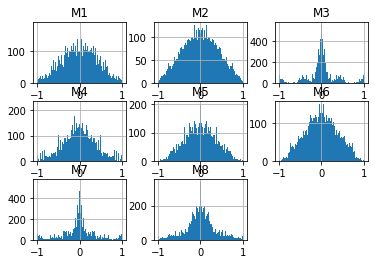

In [212]:
import matplotlib.pyplot as plt
histogram = data_norm[['M' + str(i) for i in range(1, 9)]]
plt.figure(figsize=(20, 20))
histogram.hist(bins=100)
plt.show()

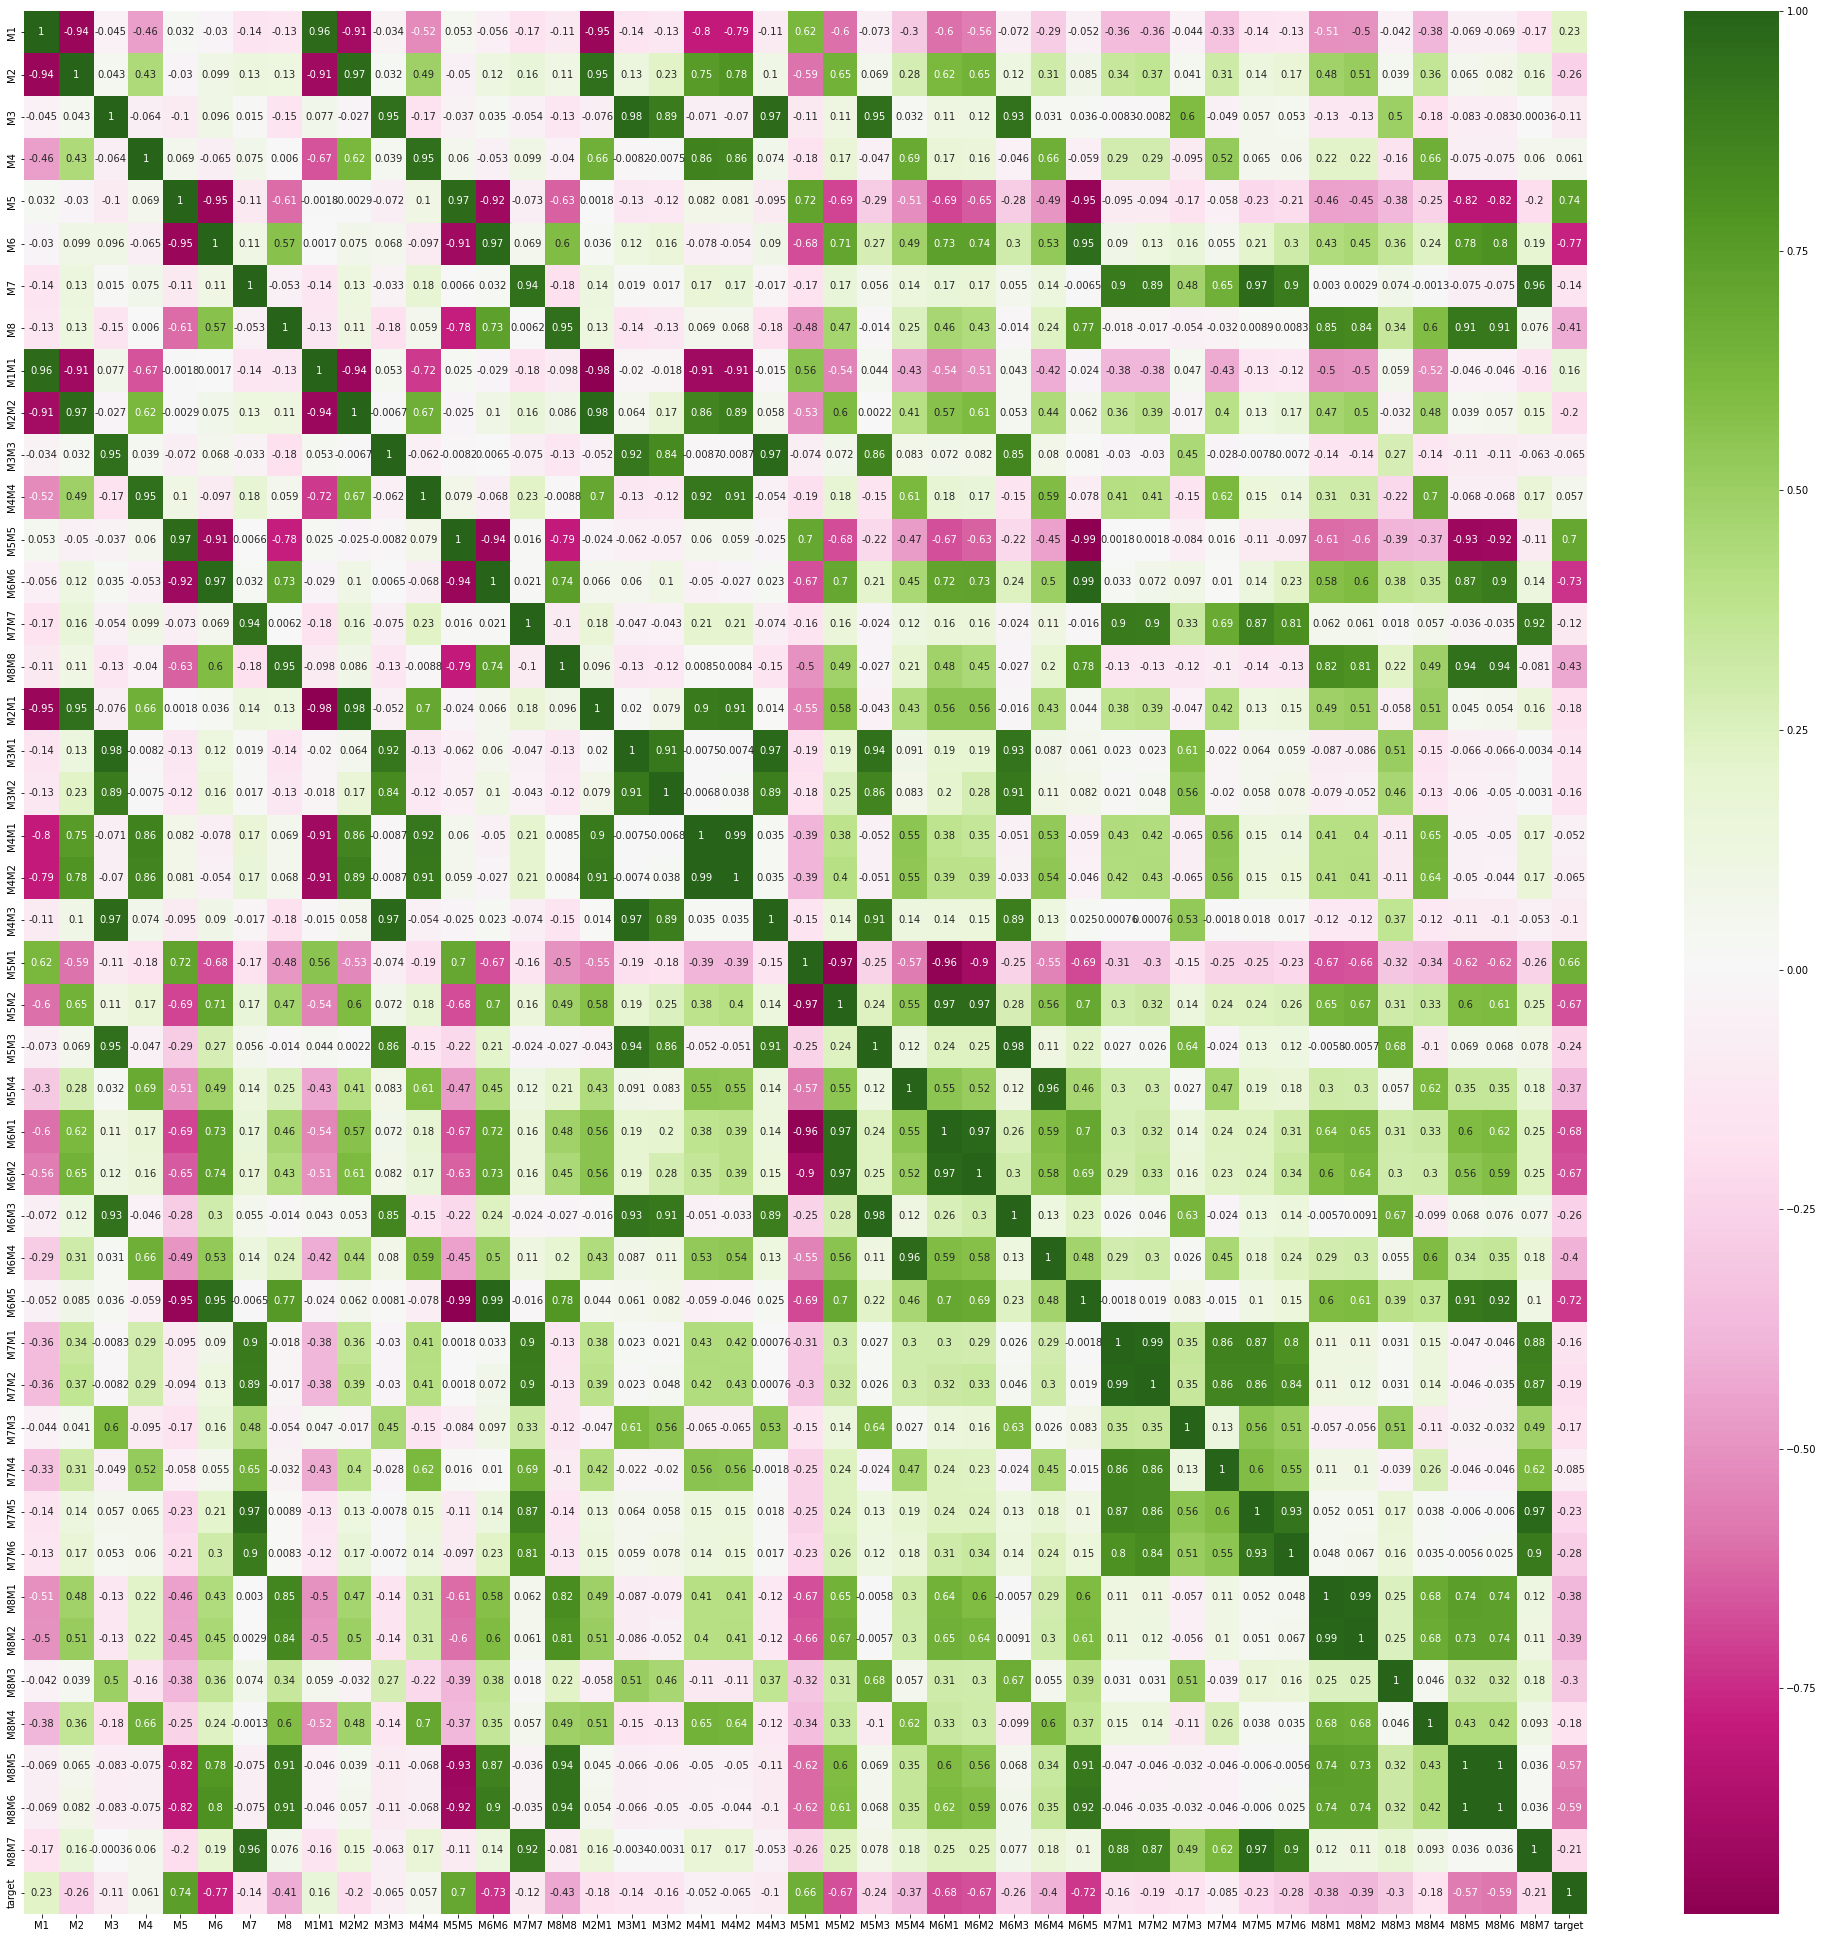

In [213]:
import pandas as pd
import numpy as np
import seaborn as sea

#correlation = data_norm[['M' + str(i) for i in range(1, 9)]]
correlation = data_norm
plt.figure(figsize=(35, 35))
sea.heatmap(correlation.corr(), annot=True, cmap="PiYG")
plt.savefig('Matrix_corr.jpg')

### 2.5 Реализация машинного обучения для SVM и LDA

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [215]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [216]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [217]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test))
print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Точность классификатора:
     SVM:  0.9841772151898734
     LDA:  0.9857594936708861
Logloss:
     SVM:  0.00987625730020712
     LDA:  0.01139460246037269


<AxesSubplot:>

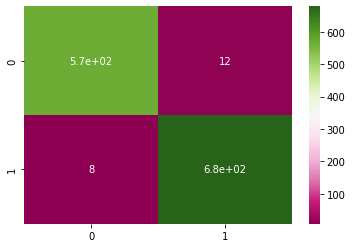

In [218]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
cnf_matrix = confusion_matrix(y_test, SVC_prediction)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")

### 2.6 Графики 

#### 2.6.1 Двумерные

In [219]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [220]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 8):
#     for j in range(i + 1, 7):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='x')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='.')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

#### 2.6.2 Трехмерные

In [221]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [222]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 5):
#     for j in range(0, 4):
#         for k in range(0, 3):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='x')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='.')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.grid()
#             plt.show()

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

### 2.1 Частные производные

Найдем все производные вплоть до 2 порядка, дифференцируя $J$ по частным производным $s,p,q,r$ 

$ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

                        Производные 1-го порядка:
$$
h_s = \frac{-p-q+s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_p = \frac{2r + p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1
$$
$$
h_q = \frac{p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_r = \frac{2p}{\sqrt[2]{4rp+(p+q-s)^2}}
$$

                        Производные 2-го порядка:
$$
h_{ss} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pp} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{rr} = \frac{-4p^2}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$

                        Смешанные производные:
$$
h_{sp} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sq} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sr} = \frac{-2p(-p-q+s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pr} = \frac{2}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{2p(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qr} = \frac{-2p(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$


In [223]:
import pandas as pd
import numpy as np
# Заново считаем J с s,p,q,r
def middle_SPQR():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]

      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv("data_middle_SPQR.csv", index=False)
   #data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR

data_SPQR = middle_SPQR()
data_SPQR

,J,S,P,Q,R
0,0.290561,-0.08648,0.116692,-0.007048,0.128455
1,0.365824,-0.13152,0.116692,-0.007930,0.128455
2,0.000000,-0.10316,-0.023918,-0.000231,0.162858
3,0.000000,-0.14708,-0.023918,-0.000622,0.162858
4,0.623470,-0.22456,0.105762,-0.005541,0.339557
...,...,...,...,...,...
75,0.663370,-0.27300,0.059678,-0.003436,0.381470
76,0.869255,-0.37012,0.072470,-0.004160,0.447676
77,0.912104,-0.39380,0.072470,-0.007365,0.447676
78,0.292812,-0.09156,0.117600,-0.007619,0.119573


In [224]:
import pandas as pd
import numpy as np
def differential(z):
    M1 = data_macro['M1'].tolist()[z]
    M2 = data_macro['M2'].tolist()[z]      
    M3 = data_macro['M3'].tolist()[z]   
    M4 = data_macro['M4'].tolist()[z]   
    M5 = data_macro['M5'].tolist()[z]
    M6 = data_macro['M6'].tolist()[z]
    M7 = data_macro['M7'].tolist()[z]
    M8 = data_macro['M8'].tolist()[z]
    p = lam[0]*M1 + lam[2]*M3 + lam[3]*M4
    q = lam[1]*M2
    r = lam[4]*M5 + lam[6]*M7 + lam[7]*M8
    s = lam[5]*M6
    # Частные производные первого порядка
    hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
    # Частные производные второго порядка
    hss = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hpp = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hqq = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hrr = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)
    # Частные производные второго порядка | другие
    hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
    hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
    hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    
    """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
    return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr

machine = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
def module(u):
    ans = 0
    for elem in u:
        ans += elem * elem
    return ans

def sc(u, v):
    ans = 0
    for i in range(len(u)):
        ans += u[i] * v[i]
    return ans

def cos_n(u, v):
    return sc(u, v) / np.sqrt(module(u) * module(v))
cos = []
coef = [0]*44
for z in range(len(data_strat)):
   hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(z)
   coef[0] = lam[0]*hp            #M1
   coef[1] = lam[1]*hq            #M2
   coef[2] = lam[2]*hp            #M3
   coef[3] = lam[3]*hp            #M4
   coef[4] = lam[4]*hr            #M5
   coef[5] = lam[5]*hs            #M6
   coef[6] = lam[6]*hr            #M7
   coef[7] = lam[7]*hr            #M8
   coef[8] = lam[8]*hpp           #M11
   coef[9] = lam[9]*hqq           #M22
   coef[10] = lam[10]*hpp         #M33
   coef[11] = lam[11]*hpp         #M44
   coef[12] = lam[12]*hrr         #M55
   coef[13] = lam[13]*hss         #M66
   coef[14] = lam[14]*hrr         #M77
   coef[15] = lam[15]*hrr         #M88
   coef[16] = lam[16]*hpq         #M12
   coef[17] = lam[17]*hpp         #M13
   coef[18] = lam[18]*hpq         #M23
   coef[19] = lam[19]*hpp         #M14
   coef[20] = lam[20]*hpq         #M24
   coef[21] = lam[21]*hpp         #M34
   coef[22] = lam[22]*hpr         #M15
   coef[23] = lam[23]*hqr         #M25
   coef[24] = lam[24]*hpr         #M35
   coef[25] = lam[25]*hpr         #M45
   coef[26] = lam[26]*hsp         #M16
   coef[27] = lam[27]*hsq         #M26
   coef[28] = lam[28]*hsp         #M36
   coef[29] = lam[29]*hsp         #M46
   coef[30] = lam[30]*hsr         #M56
   coef[31] = lam[31]*hpr         #M17
   coef[32] = lam[32]*hqr         #M27
   coef[33] = lam[33]*hpr         #M37
   coef[34] = lam[34]*hpr         #M47
   coef[35] = lam[35]*hrr         #M57
   coef[36] = lam[36]*hsr         #M67
   coef[37] = lam[37]*hpr         #M18
   coef[38] = lam[38]*hqr         #M28
   coef[39] = lam[39]*hpr         #M38
   coef[40] = lam[40]*hpr         #M48
   coef[41] = lam[41]*hrr         #M58
   coef[42] = lam[42]*hsr         #M68
   coef[43] = lam[43]*hrr         #M78
   cos.append(cos_n(coef, machine))
ju = cos.index(max([i for i in cos if not isinstance(i, complex)]))
print(ju)
result = [i for i in cos if not isinstance(i, complex)]
hy = max(np.abs(result))
print(result)
print('')
print('Косинус между векторами =', hy)
    

14
[0.9336932482404015, 0.9515841112892953, 0.9936195382591247, 0.9940756861867464, 0.996504911711714, 0.9981987005105903, 0.9945036248373049, 0.996013493584718, 0.8593822200857398, 0.9925881487243963, 0.9955413691639182, 0.9984281846624731, 0.9983142813062744, 0.9852598929605811, 0.9869656262586862, 0.9420801185476904, 0.9769285489686247, 0.9980891169693442, 0.9983888475980235, 0.9756036698647536, 0.9792046246455856, 0.8875485800494861, 0.9176779486772579, 0.9833842851945572, 0.9883723236917816, 0.9967785516950063, 0.9982149533717626, 0.868413790439338, 0.924164713733028, 0.9830504890487723, 0.9867162685023713, 0.997630826999213, 0.9974443819292406, 0.9254613136697736, 0.928218792760714, 0.9651514046547499, 0.9783243483447028, 0.9953079989992865, 0.9959865921964596, 0.9945156946699452, 0.9976221214254052, 0.97409404799063, 0.9790194973561251, 0.9818973306546451, 0.987136013438301, 0.993123404936468, 0.9978396538552753, 0.9895554396102635, 0.9964601186056696, 0.9833737862509103, 0.9862

In [234]:
hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(ju)
coef[0] = lam[0]*hp            #M1
coef[1] = lam[1]*hq            #M2
coef[2] = lam[2]*hp            #M3
coef[3] = lam[3]*hp            #M4
coef[4] = lam[4]*hr            #M5
coef[5] = lam[5]*hs            #M6
coef[6] = lam[6]*hr            #M7
coef[7] = lam[7]*hr            #M8
coef[8] = lam[8]*hpp           #M11
coef[9] = lam[9]*hqq           #M22
coef[10] = lam[10]*hpp         #M33
coef[11] = lam[11]*hpp         #M44
coef[12] = lam[12]*hrr         #M55
coef[13] = lam[13]*hss         #M66
coef[14] = lam[14]*hrr         #M77
coef[15] = lam[15]*hrr         #M88
coef[16] = lam[16]*hpq         #M12
coef[17] = lam[17]*hpp         #M13
coef[18] = lam[18]*hpq         #M23
coef[19] = lam[19]*hpp         #M14
coef[20] = lam[20]*hpq         #M24
coef[21] = lam[21]*hpp         #M34
coef[22] = lam[22]*hpr         #M15
coef[23] = lam[23]*hqr         #M25
coef[24] = lam[24]*hpr         #M35
coef[25] = lam[25]*hpr         #M45
coef[26] = lam[26]*hsp         #M16
coef[27] = lam[27]*hsq         #M26
coef[28] = lam[28]*hsp         #M36
coef[29] = lam[29]*hsp         #M46
coef[30] = lam[30]*hsr         #M56
coef[31] = lam[31]*hpr         #M17
coef[32] = lam[32]*hqr         #M27
coef[33] = lam[33]*hpr         #M37
coef[34] = lam[34]*hpr         #M47
coef[35] = lam[35]*hrr         #M57
coef[36] = lam[36]*hsr         #M67
coef[37] = lam[37]*hpr         #M18
coef[38] = lam[38]*hqr         #M28
coef[39] = lam[39]*hpr         #M38
coef[40] = lam[40]*hpr         #M48
coef[41] = lam[41]*hrr         #M58
coef[42] = lam[42]*hsr         #M68
coef[43] = lam[43]*hrr         #M78

print(cos_n(coef, machine))
q = {'Тейлор': coef, 'SVM': machine}
df = pd.DataFrame(q)
df

0.9984281846624731


,Тейлор,SVM
0,1.718397e-03,1.066556e-02
1,-1.732090e-05,2.001674e-03
2,7.517987e-07,-1.699149e-05
3,1.718397e-05,8.966423e-04
4,1.795316e-03,1.157694e-02
5,-7.133955e-03,-4.244192e-02
6,2.244146e-08,-1.059460e-05
7,1.795316e-05,3.621246e-04
8,-1.234894e-05,-9.213910e-06
9,3.610885e-09,8.738155e-05


In [226]:
for i in range(len(coef)):
    print(i, '  ', machine[i]/machine[0], '  ', coef[i]/coef[0])

0    1.0    1.0
1    0.18767639991795163    -0.01007968736468485
2    -0.0015931174096848009    0.00043749999999999995
3    0.0840689328549822    0.009999999999999998
4    1.0854508544615278    1.0447623806008255
5    -3.9793428941337217    -4.151517464506466
6    -0.0009933470029673068    1.3059529757510317e-05
7    0.03395269714505764    0.010447623806008255
8    -0.0008638935862021138    -0.007186316692387969
9    0.00819287008742225    2.1013103057587176e-06
10    1.4662450033244081e-08    -1.3755059294023848e-09
11    1.0095597871097821e-05    -7.18631669238797e-07
12    0.003975060851377202    -0.002740572629938452
13    -0.04961943433965407    0.005253275764396793
14    -4.4300188846441996e-08    -4.2821447342788307e-13
15    -3.5833455797057245e-06    -2.740572629938452e-07
16    0.0024741817947836835    -6.801698209837488e-05
17    9.296535005009138e-06    -3.144013552919737e-06
18    6.322354375024233e-06    -2.9757429668039004e-08
19    -0.0003197684762868381    -7.186316692

In [227]:
#p = lam[0]*Aj[i] + lam[0]*D - 2*np.pi*np.pi*lam[2]*Bj[i]*Bj[i] - lam[3]*(Aj[i] + D0)*(Aj[i] + D0) - 0.5*lam[3]*Bj[i]*Bj[i]
#q = lam[1]*(0.5*Bj[i] + Aj[i] + D)
#r = lam[4]*Aa[i] + lam[4]*D - 2*np.pi*np.pi*lam[6]*Ba[i]*Ba[i] - lam[7]*(Aa[i] + D0)*(Aa[i] + D0) - 0.5*lam[7]*Ba[i]*Ba[i]
#s = lam[5]*(0.5*Ba[i] + Aa[i] + D)

In [228]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* (lam[i]*Max_M[i]) / (lam[j]*Max_M[j]) * x, label='true')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [232]:
def gdrf(ju):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()
    M3 = data_macro['M3'].tolist()
    M4 = data_macro['M4'].tolist()
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()

    gh = hp*(lam[0]*M1[z] + lam[2]*M3[z] + lam[3]*M4[z])
    ht = machine[0]*M1[z] + machine[2]*M3[z] + machine[3]*M4[z]

    print(hp*(lam[0]*M1[z] + lam[2]*M3[z] + lam[3]*M4[z])/gh, (machine[0]*M1[z] + machine[2]*M3[z] + machine[3]*M4[z])/ht)
    print(hq*lam[1]*M2[z]/gh, machine[1]*M2[z]/ht)
    print(hr*(lam[4]*M5[z] + lam[6]*M7[z] + lam[7]*M8[z])/gh, (machine[4]*M5[z] + machine[6]*M7[z] + machine[7]*M8[z])/ht)
    print(hs*lam[5]*M6[z]/gh, machine[5]*M6[z]/ht)

    print(hss*(lam[5]*M6[z])**2/gh, (machine[5]*M6[z])**2/ht)
    print(hpp*(lam[0]*M1[z] + lam[2]*M3[z] + lam[3]*M4[z])**2/gh,(machine[0]*M1[z] + machine[2]*M3[z] + machine[3]*M4[z])**2/ht)
    print(hqq*(lam[5]*M6[z])**2/gh, (machine[5]*M6[z])**2/ht)
    print(hrr*(lam[4]*M5[z] + lam[6]*M7[z] + lam[7]*M8[z])**2/gh, (machine[4]*M5[z] + machine[6]*M7[z] + machine[7]*M8[z])**2/ht)

    print('----------------------------------------------------')
    hs_ = (machine[5]*M6[ju])/(lam[5]*M6[ju])
    hp_ = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])
    hq_ = (machine[1]*M2[i])/(lam[1]*M2[i])
    hr_ = (machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])
    hss_ = (machine[5]*M6[i])**2/(lam[5]*M6[i])**2
    hpp_ = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])**2/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])**2
    hqq_ = (machine[1]*M2[i])**2/(lam[1]*M2[i])**2
    hrr_ = (machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])**2/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])**2
    hsp_ = (machine[5]*M6[i]*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))/(lam[5]*M6[i]*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hsq_ = (machine[5]*M6[i]*machine[1]*M2[i])/(lam[5]*M6[i]*lam[1]*M2[i])
    hsr_ = ((machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hpq_ = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))
    hpr_ = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hqr_ = (machine[1]*M2[i]*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/(lam[1]*M2[i]*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    print(hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_)
    return hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_


hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(ju)
hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_ = gdrf(ju)
h1 = [hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr]
h2 = [hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_]
print('------------------------------------')
print(hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr)
print('Косинус = ', cos_n(h1, h2))
df=pd.DataFrame([['hp',  hp /hp,  hp_ /hp_],
                 ['hq',  hq /hp,  hq_ /hp_],
                 ['hr',  hr /hp,  hr_ /hp_],
                 ['hs',  hs /hp,  hs_ /hp_],
                 ['hpp', hpp/hp,  hpp_/hp_],
                 ['hqq', hqq/hp,  hqq_/hp_],
                 ['hrr', hrr/hp,  hrr_/hp_],
                 ['hss', hss/hp,  hss_/hp_],
                 ['hsp', hsp/hp,  hsp_/hp_],
                 ['hsq', hsq/hp,  hsq_/hp_],
                 ['hsr', hsr/hp,  hsr_/hp_],
                 ['hpq', hpq/hp,  hpq_/hp_],
                 ['hpr', hpr/hp,  hpr_/hp_],
                 ['hqr', hqr/hp,  hqr_/hp_],
                 ], 
    columns=['id','Тейлор', 'SVC'])
df

1.0 1.0
0.014498281490119487 0.17266708707589556
0.28327759335064856 -0.0743554745015805
1.6351882143172074 -1.0025422296640347
0.05990176875655621 -1.231817304852656
-0.5281947025050682 -1.2255779826198965
0.05990176875655621 -1.231817304852656
-0.014808749976676422 -0.006775897834393159
----------------------------------------------------
-10.61048085771071 -18.08518905321465 25.020925586848524 1.2110052194253744 112.58230403184547 327.074063090515 626.046717222611 1.4665336414754993 191.89255225721334 -265.4840519814604 -12.849347699300697 -452.50816952457126 -21.901258337737584 30.300471480527456
------------------------------------
-1.7834887037569715 1.073998073598971 -0.21651129624302834 0.2992194091023897 0.5642008051046318 -4.823806427435505 0.5642008051046318 -0.13081643222719835 0.9131263468208788 -0.5642008051046318 0.3425352560626416 -0.9131263468208788 2.0154830327985147 -0.3425352560626416
Косинус =  -0.09106797098411558


,id,Тейлор,SVC
0,hp,1.000000,1.000000
1,hq,-0.201594,-1.383504
2,hr,0.278603,-0.066961
3,hs,-1.660607,0.586694
4,hpp,-4.491448,-18.085189
5,hqq,0.525328,-34.616543
6,hrr,-0.121803,-0.081090
7,hss,0.525328,-6.225111
8,hsp,0.850212,-10.610481
9,hsq,-0.525328,14.679639
